In [32]:
#biblioteca de calculo
import numpy as np

#biblioteca para machine learning scikit-learn
from sklearn.datasets import load_iris # carregar os dados da base iris
from sklearn.model_selection import train_test_split # funçao para dividir a base em treino e teste
from sklearn.preprocessing import OneHotEncoder #função para normalização

#funções diversas da bibliotecas keras
from keras.models import Sequential # objeto que cria rede neural
from keras.layers import Dense # objeto ue cria camadas
from keras.optimizers import Adam # otimizador da rede neural

In [33]:
iris_data = load_iris() # load the iris dataset

print('Example data: ')
print(iris_data.data[:7])
print('Example labels: ')
print(iris_data.target[48:115])

x = iris_data.data
y_= iris_data.target.reshape(-1, 1) # Convert data to a single column

# Normalização
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_)
print(y[48:53])

# Dividir em Treino e Teste
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.30)

Example data: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]]
Example labels: 
[0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


/Users/brunoluz2/Documents/github/senac-pos-big-data/analise-informacoes-bi-analytics/exercicio-07/venv/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [34]:
#inicia a construção da rede neural
model = Sequential()

#adicionando camadas
#na primeira camada, é necessário definir o input_shape ( que deve ser igual ao numero de colunas no X)

model.add(Dense(1, input_shape=(4,), activation='relu', name='fc11'))
model.add(Dense(1, activation='relu', name='fc22'))
#normalmente quando é um problema de classificação, utilizamos ativação softmax na ultima camada
model.add(Dense(3, activation='softmax', name='output'))

# O método compile recebe o otimizador, função loss e a métrica
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

print('Neural Network Model Summary: ')
print(model.summary())
     

Neural Network Model Summary: 
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc11 (Dense)                (None, 1)                 5         
                                                                 
 fc22 (Dense)                (None, 1)                 2         
                                                                 
 output (Dense)              (None, 3)                 6         
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [35]:
#treina o modelo usando um certo numero de iterações (épocas)
history = model.fit(train_x, train_y, verbose=2, epochs=200, validation_split=0.3)


Epoch 1/200
3/3 - 0s - loss: 1.0984 - accuracy: 0.2740 - val_loss: 1.1010 - val_accuracy: 0.1875 - 388ms/epoch - 129ms/step
Epoch 2/200
3/3 - 0s - loss: 1.0981 - accuracy: 0.2329 - val_loss: 1.1020 - val_accuracy: 0.1562 - 14ms/epoch - 5ms/step
Epoch 3/200
3/3 - 0s - loss: 1.0979 - accuracy: 0.2329 - val_loss: 1.1039 - val_accuracy: 0.1562 - 13ms/epoch - 4ms/step
Epoch 4/200
3/3 - 0s - loss: 1.0978 - accuracy: 0.2192 - val_loss: 1.1059 - val_accuracy: 0.0625 - 14ms/epoch - 5ms/step
Epoch 5/200
3/3 - 0s - loss: 1.0975 - accuracy: 0.1781 - val_loss: 1.1077 - val_accuracy: 0.0625 - 14ms/epoch - 5ms/step
Epoch 6/200
3/3 - 0s - loss: 1.0974 - accuracy: 0.1781 - val_loss: 1.1082 - val_accuracy: 0.0625 - 13ms/epoch - 4ms/step
Epoch 7/200
3/3 - 0s - loss: 1.0973 - accuracy: 0.1644 - val_loss: 1.1084 - val_accuracy: 0.2188 - 13ms/epoch - 4ms/step
Epoch 8/200
3/3 - 0s - loss: 1.0971 - accuracy: 0.3151 - val_loss: 1.1085 - val_accuracy: 0.0625 - 13ms/epoch - 4ms/step
Epoch 9/200
3/3 - 0s - loss: 

In [36]:
results = model.evaluate(test_x, test_y)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

2/2 [==============================] - 0s 3ms/step - loss: 0.9285 - accuracy: 0.3333
Final test set loss: 0.928471
Final test set accuracy: 0.333333


[Text(0.5, 23.52222222222222, 'Época')]

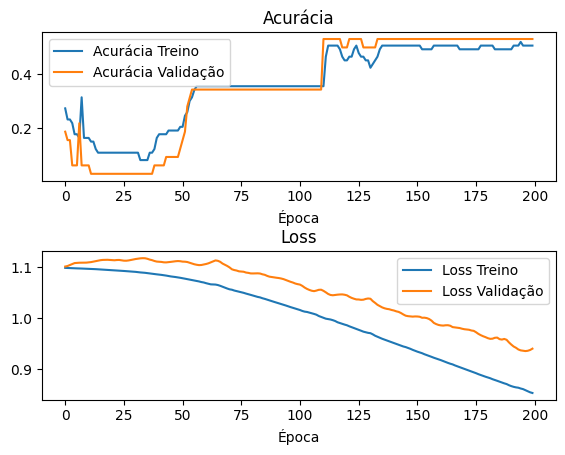

In [37]:
from matplotlib import pyplot

fig, axs = pyplot.subplots(2)

fig.tight_layout(pad=3.0)

x=history.history['accuracy']
xv=history.history['val_accuracy']
axs[0].plot(x, label='Acurácia Treino')
axs[0].plot(xv, label='Acurácia Validação')
axs[0].legend()
axs[0].set_title('Acurácia')
axs[0].set(xlabel='Época')

x=history.history['loss']
xv=history.history['val_loss']
axs[1].plot(x, label='Loss Treino')
axs[1].plot(xv, label='Loss Validação')
axs[1].legend()
axs[1].set_title('Loss')
axs[1].set(xlabel='Época')

# Ao reduzir o número de neurônios para 1 houve muita diferença na acurácia obtida. Foi de 91% para 33#.